In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

In [7]:
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [8]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


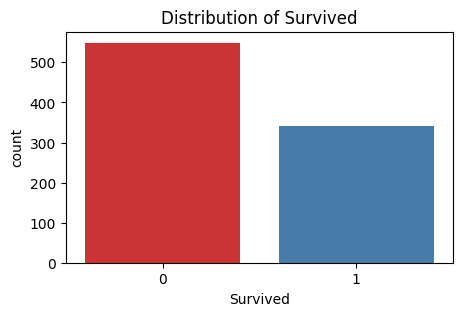

In [10]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Survived', data=train_data, palette='Set1')
plt.title('Distribution of Survived')
plt.show()

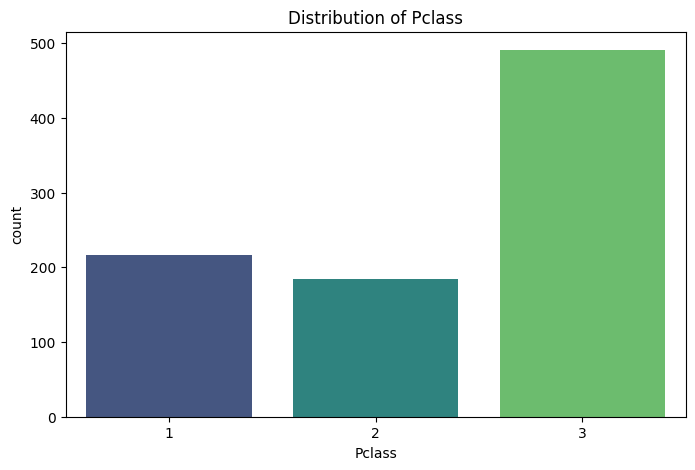

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', data=train_data, palette='viridis')
plt.title('Distribution of Pclass')
plt.show()

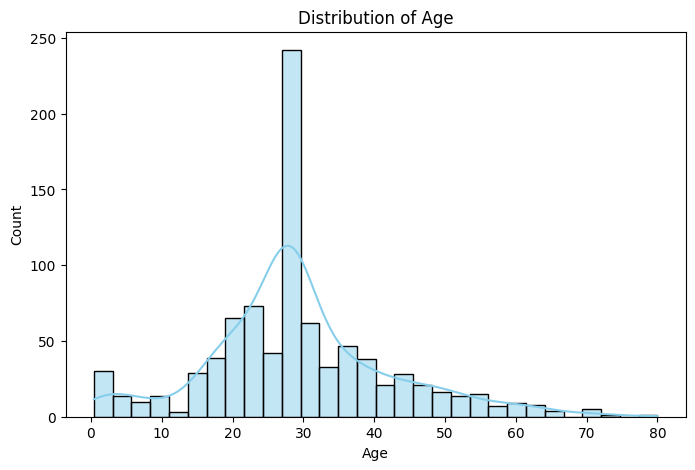

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.show()

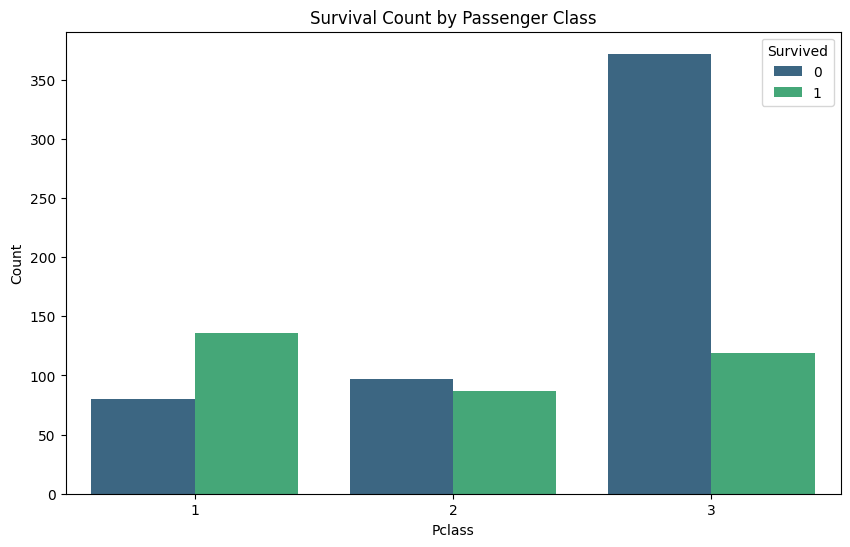

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data, palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [14]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [15]:
gender_mapping = {'female': 0, 'male': 1}
train_data['Sex'] = train_data['Sex'].map(gender_mapping)
train_data = pd.get_dummies(train_data, columns=['Embarked'])

test_data['Sex'] = test_data['Sex'].map(gender_mapping)
test_data = pd.get_dummies(test_data, columns=['Embarked'])

In [16]:
columns_to_drop = ['PassengerId','Name','Ticket']

train_data.drop(columns_to_drop, axis=1, inplace=True)
test_data.drop(columns_to_drop, axis=1, inplace=True)

In [22]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0.827377,1,-0.565736,0.432793,-0.473674,-0.502445,False,False,True
1,1,-1.566107,0,0.663861,0.432793,-0.473674,0.786845,True,False,False
2,1,0.827377,0,-0.258337,-0.474545,-0.473674,-0.488854,False,False,True
3,1,-1.566107,0,0.433312,0.432793,-0.473674,0.420730,False,False,True
4,0,0.827377,1,0.433312,-0.474545,-0.473674,-0.486337,False,False,True


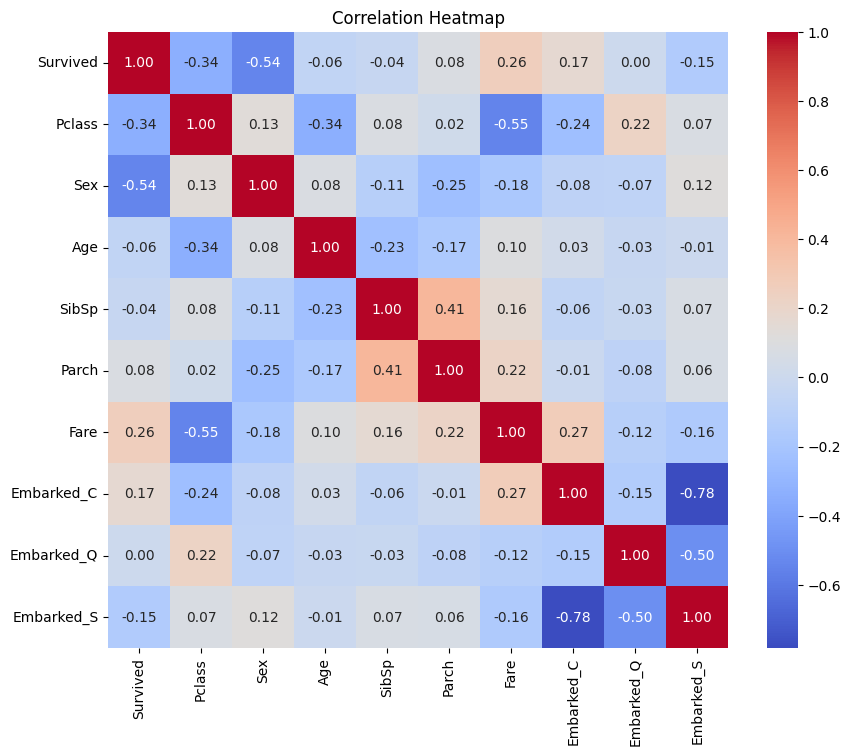

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0.827377,1,-0.565736,0.432793,-0.473674,-0.502445,False,False,True
1,1,-1.566107,0,0.663861,0.432793,-0.473674,0.786845,True,False,False
2,1,0.827377,0,-0.258337,-0.474545,-0.473674,-0.488854,False,False,True
3,1,-1.566107,0,0.433312,0.432793,-0.473674,0.420730,False,False,True
4,0,0.827377,1,0.433312,-0.474545,-0.473674,-0.486337,False,False,True


In [24]:
correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
train_data.head()

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[['Pclass']] = scaler.fit_transform(train_data[['Pclass']])
train_data[['Age']] = scaler.fit_transform(train_data[['Age']])
train_data[['SibSp']] = scaler.fit_transform(train_data[['SibSp']])
train_data[['Parch']] = scaler.fit_transform(train_data[['Parch']])
train_data[['Fare']] = scaler.fit_transform(train_data[['Fare']])
print(train_data.head())
scaler = StandardScaler()
test_data[['Pclass']] = scaler.fit_transform(test_data[['Pclass']])
test_data[['Age']] = scaler.fit_transform(test_data[['Age']])
test_data[['SibSp']] = scaler.fit_transform(test_data[['SibSp']])
test_data[['Parch']] = scaler.fit_transform(test_data[['Parch']])
test_data[['Fare']] = scaler.fit_transform(test_data[['Fare']])
test_data.head()

   Survived    Pclass  Sex       Age     SibSp     Parch      Fare  \
0         0  0.827377    1 -0.565736  0.432793 -0.473674 -0.502445   
1         1 -1.566107    0  0.663861  0.432793 -0.473674  0.786845   
2         1  0.827377    0 -0.258337 -0.474545 -0.473674 -0.488854   
3         1 -1.566107    0  0.433312  0.432793 -0.473674  0.420730   
4         0  0.827377    1  0.433312 -0.474545 -0.473674 -0.486337   

   Embarked_C  Embarked_Q  Embarked_S  
0       False       False        True  
1        True       False       False  
2       False       False        True  
3       False       False        True  
4       False       False        True  


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,1,0.386231,-0.499470,-0.400248,-0.497811,False,True,False
1,0.873482,0,1.371370,0.616992,-0.400248,-0.512660,False,False,True
2,-0.315819,1,2.553537,-0.499470,-0.400248,-0.464532,False,True,False
3,0.873482,1,-0.204852,-0.499470,-0.400248,-0.482888,False,False,True
4,0.873482,0,-0.598908,0.616992,0.619896,-0.417971,False,False,True


In [19]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,34.5,0,0,7.8292,False,True,False
1,3,0,47.0,1,0,7.0000,False,False,True
2,2,1,62.0,0,0,9.6875,False,True,False
3,3,1,27.0,0,0,8.6625,False,False,True
4,3,0,22.0,1,1,12.2875,False,False,True


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

X = train_data.drop('Survived',axis=1)
y = train_data['Survived']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")


conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8100558659217877
ROC AUC: 0.8824967824967825
Confusion Matrix:
[[90 15]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [31]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_data_lgb = lgb.Dataset(X_train, label=y_train)
test_data_lgb = lgb.Dataset(X_test, label=y_test, reference=train_data_lgb)


params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 36,
    'learning_rate': 0.07,
    'feature_fraction': 0.9
}


num_round = 200
bst = lgb.train(params, train_data_lgb, num_round, valid_sets=[test_data_lgb])


model_file_path = 'saved_model.txt'
bst.save_model(model_file_path)


y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]


accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


conf_matrix = confusion_matrix(y_test, y_pred_binary)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
print("\nConfusion Matrix:")
print(conf_matrix_df)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
